In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df1=load_iris()

In [17]:
df=pd.DataFrame(df1.data,columns=df1.feature_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['Target']=df1.target

In [22]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [24]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

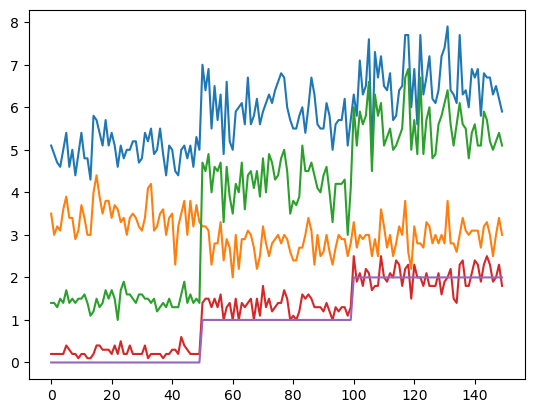

In [25]:
plt.plot(df)

In [34]:
X=df.iloc[:,:4]

In [35]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
y=df.iloc[:,-1]

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [42]:
import seaborn as sns

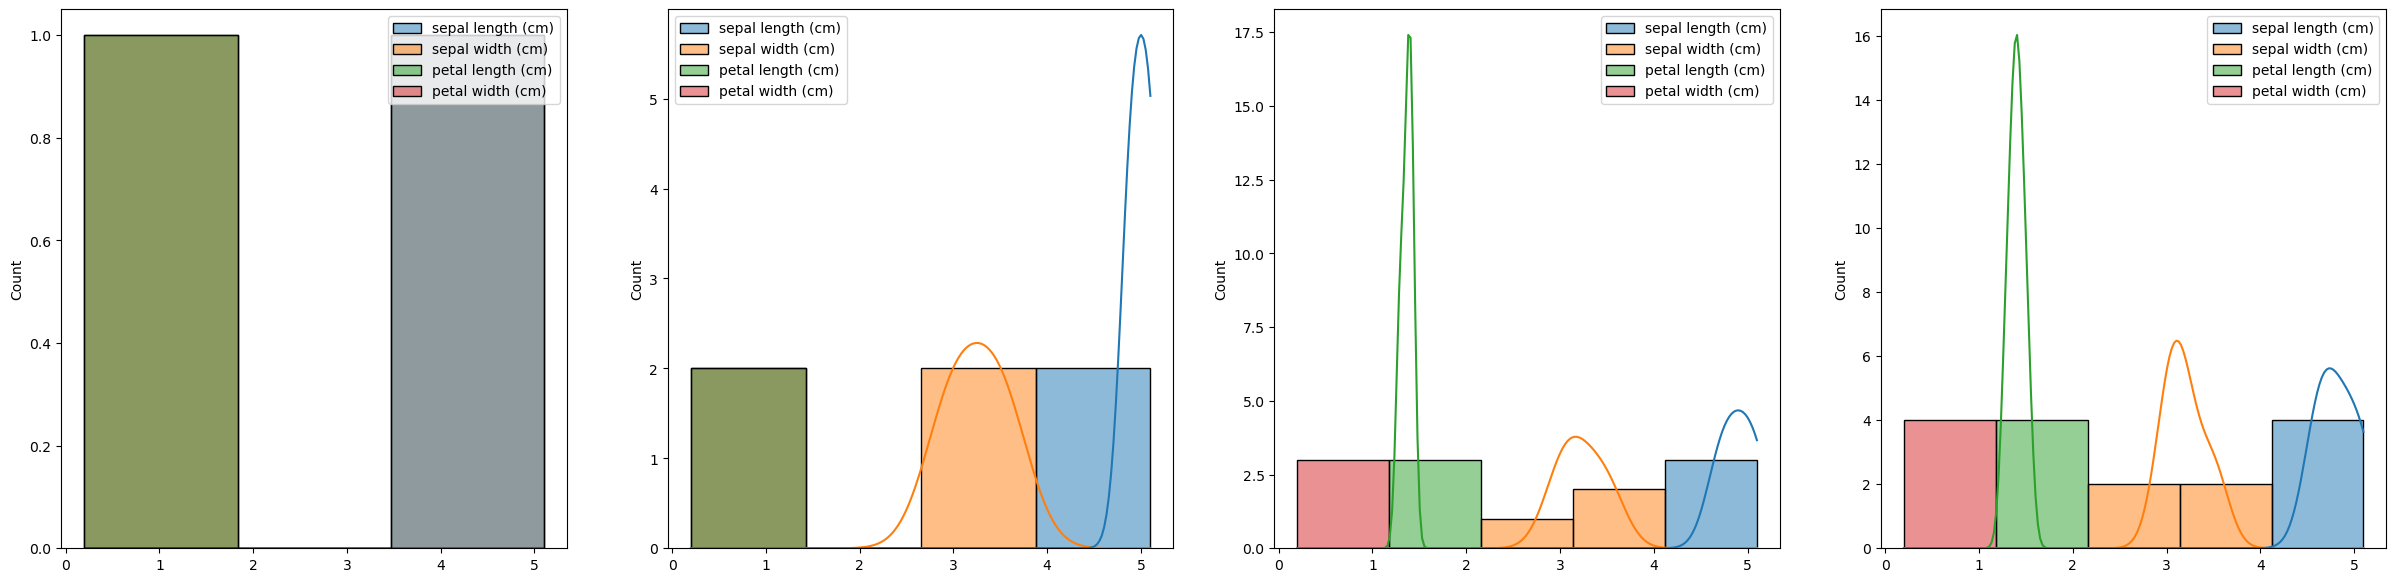

In [57]:
fig,axis=plt.subplots(1,2,figsize=(30,7))
plt.subplot(141)
sns.histplot(data=X[:1],kde=True)
plt.subplot(142)
sns.histplot(data=X[:2],kde=True)
plt.subplot(143)
sns.histplot(data=X[:3],kde=True)
plt.subplot(144)
sns.histplot(data=X[:4],kde=True)
plt.show()

In [59]:
y.value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [60]:
# from above output we got to know this is multi class classification

<AxesSubplot:xlabel='Target', ylabel='Count'>

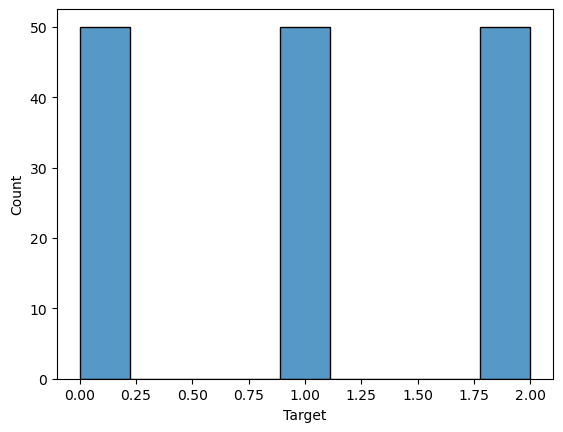

In [63]:
sns.histplot(y)

In [74]:
len(df[df.duplicated()])

1

In [71]:
df.shape

(150, 5)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [76]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [77]:
# lets train our model

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
gsb=GaussianNB()

In [82]:
gsb.fit(X_train,y_train)

GaussianNB()

In [84]:
y_pred=gsb.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0
